# Exercise 02 - Solutions
Introduction to Numerical Problem Solving, Spring 2017   
4.2.2017, Sakari Lukkarinen   
Helsinki Metropolia University of Applied Sciences

In [76]:
# Initial import statements
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import *
from numpy import *

## Problem 3

Modify your code to calculate the smallest number xmin, that differs from zero.

### Solution

We need to work slightly differently when we are looking for the smallest number that differs from zero. If we just test if $eps == 0$, then eps = 0, and we get zero as results, when we multiply by 2. I we test before the division by 2, that if $eps/2 == 0$, and that is true, then eps is the smallest number.

There are several options, how to do that, but here is one solution.

In [77]:
eps = 1.0
while True:
    if eps/2 == 0:
        break
    eps = eps/2
print("The smallest number that differs from 0 is", eps)

The smallest number that differs from 0 is 5e-324


## Problem 4

How does the (epsilon) change, when you increase or decrease the study point ? What is the relationship of the study point and epsilon? Use values that differ several decades.

### Solution
Let's change the point of study (x) in powers of ten. Then for each value of x, we find out what is the smallest number that differs from the point of study. We use the same logic as in previous problem to find the value of epsilon.

Lastly we make a graph, where we have the point of study values at x-axis and the epsilons in y-axis. If we plot the graph in log-log scale we can observe, that the epsilon increases at the same rate as the point of study, e.g. if the point of study is increased 10 times, so is the epsilon.

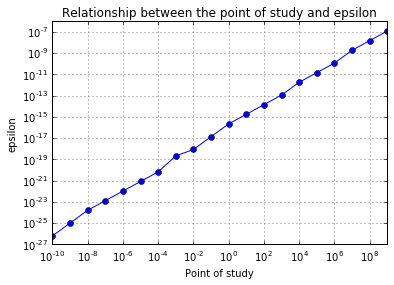

In [78]:
# Number of study points
N = 20
x = zeros(N)
y = zeros(N)

for i in range(N):
    x[i] = 10**(i-10) # Start from 1e-10 and end to 1e9
    eps = 1.0
    while True:
        if eps/2 + x[i] == x[i]:
            break
        eps = eps/2
    y[i] = eps

figure()
loglog(x, y, 'o-')
xlabel('Point of study')
ylabel('epsilon')
title('Relationship between the point of study and epsilon')
grid()

## Problem 5

The derivative of $f(x) = 1=(1 - 3x^2)$ is given by $f'(x) = 6x/(1 - 3x^2)^2$. Do you expect to have diffculties evaluating this function at $x = 0.577$? How does the value of the derivative change when you increase the significant figures in your calculations. Try using from 3-digit to 16-digit arithmetics.

### Solution

We use the Decimal-object and define x as a constant and the derivative as a function, df(x). Then we create a loop where the precision is increased from 3 to 16, the value of the derivative is evaluated and the results are printed.

By studing the results we can observe that the df(x) have noticeably different values for 3, 4, and 5-digits, but after 6 digits it starts to be rather stable. We could conclude that 6 to 8 significant figures in arithmetics is rather safe accuracy for this problem. 

In [79]:
from decimal import *
x = Decimal('0.577')

def df(x):
    return 6*x/(1 - 3*x**2)**2

for n in range(3, 17):
    getcontext().prec = n
    y = df(x)
    print('{0:3d} {1:20.10f}'.format(n, y))

  3   3460000.0000000000
  4   2049000.0000000000
  5   2364600.0000000000
  6   2352910.0000000000
  7   2352911.0000000000
  8   2352910.8000000000
  9   2352910.7900000000
 10   2352910.7930000000
 11   2352910.7926000000
 12   2352910.7926000000
 13   2352910.7926020000
 14   2352910.7926020000
 15   2352910.7926019900
 16   2352910.7926019920


## Problem 6

Determine the number of terms necessary to approximate cos(x) to 8 significant figures using the Maclaurin series approximation.

### Solution

First, let's calculate the stop criteria and the true value. The first approximation is $cos(x) = 1$. Then adding more terms iterativel
y, maximum 20 terms. Break the loop if the relative true error is less than stop criteria. Lastly print the results.

In [80]:
from scipy.misc import factorial

n = 8             # Number of significant figures
es = 0.5*10**(-n) # Stop criteria
x = 0.3*pi        # Value of x
y_true = cos(x)   # True value of cos(x)
y = 1             # First term of series approximation
i = 1             # Number of terms
imax = 20         # Maximum iterations

while i < imax:
    
    # Add next term in series
    y = y + (-1)**(i)*x**(2*i)/factorial(2*i)
    i = i + 1
    
    # True error
    et = abs(y - y_true)
    
    # Relative true error
    et_rel = et/abs(y_true)
    
    # Break the loop if criteria fullfilled
    if et_rel <= es:
        break

print("Significant figure:  {0:1d}".format(n))
print("Number of terms:     {0:1d}".format(i))
print("Estimated value:     {0:.16f}".format(y))
print("True value:          {0:.16f}".format(y_true))
print("True error:          {0:.16f}".format(et))
print("Relative true error: {0:.16f}".format(et_rel)) 
print("Stop criteria:       {0:.16f}".format(es))

Significant figure:  8
Number of terms:     6
Estimated value:     0.5877852512720046
True value:          0.5877852522924731
True error:          0.0000000010204685
Relative true error: 0.0000000017361247
Stop criteria:       0.0000000050000000
